In [1]:
import yaml
import os
import PIL
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
%load_ext autoreload
%autoreload 2
def draw_image(image):
    return PIL.Image.fromarray((np.array(image) * 255).astype(np.uint8))


def read_nii_file(path):
    nifti = nib.load(path)
    data_array = nifti.get_data()
    affine_matrix = nifti.affine
    return data_array


In [2]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import nibabel as nib
from tqdm import tqdm
import argparse
import monai
import torch
import PIL
from sklearn.model_selection import train_test_split
from torch.utils.tensorboard import SummaryWriter

def nifti_to_2d_slices(input_folder: str, output_folder: str, axis: int, filtered, resize):
    complete_input_folder = sorted(os.listdir(input_folder))
    #train, val = train_test_split(input_folder, test_size=0.1, random_state=42)
    #print(train)
    for fname in tqdm(complete_input_folder):

        if not fname.endswith("nii.gz"):
            continue

        n_file = os.path.join(input_folder, fname)
        nifti = nib.load(n_file)

        np_data = nifti.get_fdata()
        np_data = np_data.astype(np.float16)
        # np_data.shape (512, 512, 120)

        f_basename = fname.split(".")[0]
        #np_data.shape[axis]
        for i in range(5,np_data.shape[axis] - 5):
            slc = [slice(None)] * len(np_data.shape)
            
            slc[axis] = i
            image = np_data[slc]
            # image.shape (512, 512)

            if resize:
                tr = monai.transforms.Resize((resize, resize))
                image = tr(image[None])[0]

            if filtered:
                brain_mask = image > 0
                if brain_mask.sum() < 4000:
                    continue
            #image = PIL.Image.fromarray((np.array(image) * 255).astype(np.uint8))
            #print(image)
            fp = os.path.join(output_folder, f"{f_basename}_{i}")
            plt.imsave(f"{fp}.jpeg", np.array(image), cmap='gray')
            #image.save(f"{fp}.jpeg")
            #np.save(os.path.join(output_folder, f"{f_basename}_{i}.jpeg"), image)


input_dir = r"data\source"
output_dir = r"data\imagesA"
axis = 2
do_filter = False
resize = 256
os.makedirs(output_dir, exist_ok=True)

nifti_to_2d_slices(input_dir, output_dir, axis, do_filter, resize)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


c:\Users\HP\anaconda3\envs\uqdl\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/3 [00:00<?, ?it/s]C:\Users\HP\AppData\Local\Temp/ipykernel_23712/2542382177.py:37: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  image = np_data[slc]
 33%|███▎      | 1/3 [00:03<00:07,  3.58s/it]


KeyboardInterrupt: 

In [8]:


output_dir = r"data\dummy654"
axis = 2
input_dir = r"data\source"
do_filter = False
resize = 256
os.makedirs(output_dir, exist_ok=True)
inp_arr = sorted(os.listdir(input_dir))




['crossmoda2021_ldn_2_ceT1.nii.gz', 'crossmoda2021_ldn_3_ceT1.nii.gz']

C:\Users\HP\AppData\Local\Temp/ipykernel_21852/2497799546.py:15: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  data_array = nifti.get_data()


(512, 512)


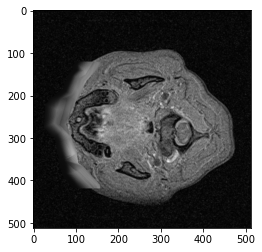

In [48]:
from skimage import data
import napari
import numpy as np
import PIL
import torch


input_dir = r"data\source"
res = read_nii_file(f'{input_dir}/crossmoda2021_ldn_1_ceT1.nii.gz')

#anw = np.array(res)
#print(res.dtype)
res = res.astype(float)
np_data = torch.tensor(res).unsqueeze(0)
print(res[:,:,1].shape)
#monai.visualize.img2tensorboard.plot_2d_or_3d_image(np_data,writer=writer,step=1)
viewer = napari.view_image(np_data, rgb=False)

plt.imshow(res[:,:,1], cmap='gray')
plt.show()

In [9]:


numpy_array = np.load('data/out\crossmoda2021_ldn_10_ceT1_0.npy')
numpy_array.shape

(256, 256)

In [16]:
from torch.utils.data.dataloader import DataLoader
from datasets import DatasetType
from datasets import DATASETS
from transforms import TRANSFORMS
with open('train_example.yaml', 'r') as stream:
    config = yaml.load(stream, Loader=yaml.FullLoader)




dataset_type = config['train_dataset']['dataset_type']
dataset_kwargs = config['train_dataset']['dataset_kwargs']
transform_kwargs = config['train_dataset']['transform_kwargs']




transform = TRANSFORMS[DatasetType[dataset_type]](**transform_kwargs)
dataset = DATASETS[DatasetType['numpy2d']](
    transform=transform,
    **dataset_kwargs
)

dl = DataLoader(dataset, batch_size=64, shuffle=True, drop_last=True, pin_memory=False)

next(iter(dl)).shape

0


TypeError: default_collate: batch must contain tensors, numpy arrays, numbers, dicts or lists; found <class 'PIL.Image.Image'>

In [44]:
mean = 0.0
meansq = 0.0
count = 0

for index, data in enumerate(train_loader):
    mean = data.sum()
    meansq = meansq + (data**2).sum()
    count += np.prod(data.shape)

c:\Users\HP\Desktop\AppDL\crossmoda-challenge\datasets.py:102: RuntimeWarning: overflow encountered in multiply
  image = PIL.Image.fromarray((np.array(image) * 255).astype(np.uint8))


torch.Size([3, 64, 64])

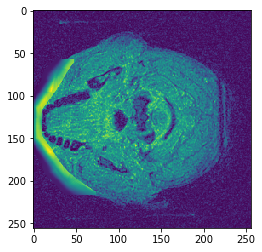

In [10]:
from matplotlib import pyplot as plt
plt.imshow(numpy_array, interpolation='nearest')
plt.show()

In [7]:

import PIL
image = PIL.Image.open('data/labelsA\crossmoda2021_ldn_3_Label_36.jpeg')
print(image.format)
print(image.size)
print(image.mode)
arr = np.array(image)

JPEG
(256, 256)
RGB


[array([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 